## Cotizaciones de las principales empresas en pandemia

Este notebook tiene la finalidad de explorar brevemente las librerias `yahoo finance`, `pandas` y `matplotlib`. Se realizara un proceso exploratorio de las cotizaciones de las empresas desde 2019 a 2022, al igual que sus precios historicos. Se puede consultar mas sobre la documentacion de `yfinance` en: https://pypi.org/project/yfinance/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf
from datetime import datetime

Se define, mediante _dictionaries_, cuales son las empresas por analizar. Se debe colocar el _Ticker_ con el que cotizan en la bolsa de valores como _key_ y el nombre de la empresa como _value_

In [2]:
companies = {
    "AMZN": "Amazon",
    "AAPL":"Apple",
    "KO":"Coca-Cola",
    "META":"Meta",
    "MSFT":"Microsoft",
    "NFLX":"Netflix",
    "PYPL":"PayPal",
    "SHOP":"Shopify",
    "SPOT":"Spotify",
    "TCEHY":"Tencent",
    "TSLA":"Tesla",
    "ZM":"Zoom"
}

Como un proceso adicional, se puede separar los _keys_ y los _values_ en dos listas diferentes. Estas serviran posteriormente para la importacion de los datos, el renombramiento de estos y el presentarlos graficamente

In [3]:
companies_keys = list(companies.keys())
companies_name = list(companies.values())

Previo a la importacion de todos los datos, se debe crear el entorno en el que estaran los precios de las cotizaciones. Se crea un `DataFrame` vacio que luego va a contener el precio de cierre de las acciones las empresas previamente definidas

In [4]:
data = pd.DataFrame()

Mediante un loop se importara los precios de las acciones de todas las empresas pertenecientes a la variable _companies_. La importacion se realiza mediante el codigo unico de cotizacion de cada empresa o _Ticker_, por lo que es de gran utilidad contar con la lista llamada _companies\_keys_. Cada una de ellas se importara a la variable _data_.

El comando `concat` colocara las fechas y precio de cierre de las acciones de Amazon (la primera en importarse). Luego el comando `merge` vinculara cada fecha de cotizacion y asignara cada precio con cada las fecha que ya forme parte de la data. Es importante notar que se tomara de referencia las fechas de Amazon desde su primer dia de cotizacion, por lo que habra data vacia en algunas empresas que aun no cotizaban

In [5]:
# Loop para importar todas las acciones que forman parte de la lista companies_keys
for key in companies_keys:
    company_data = yf.Ticker(key)
    company_data = company_data.history(period="max")
    company_data.reset_index(inplace=True)
    
    # Se crea una variable con el precio de cierre de las acciones, y se le asigna el nombre de su Ticker
    company_data[key] = company_data.Close
    
    # Comenzamos con la union de cada una de las empresas
    if data.empty is True:
        data = pd.concat([data, company_data[["Date", key]]])
    else:
        data = pd.merge(data, company_data[["Date", key]], how="left")

Tras la importacion, se puede colocar la variable `Date` como el indice del DataFrame `data`

In [6]:
data.set_index("Date", inplace=True)

Usando el metodo `head`, se puede visualizar las primeras cinco filas. Como se aprecia en el resultado, existen algunas empresas que aun no cotizaban en 1997, por lo que cuentan con _missing values_

In [7]:
data.head()

,AMZN,AAPL,KO,META,MSFT,NFLX,PYPL,SHOP,SPOT,TCEHY,TSLA,ZM
Date,,,,,,,,,,,,
1997-05-15,0.097917,0.135317,17.742298,NaN,9.182946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.086458,0.131505,17.480906,NaN,9.050641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.085417,0.129600,17.774973,NaN,9.026140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.081771,0.131505,17.872997,NaN,9.339756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.071354,0.128647,17.611603,NaN,9.437757,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cada empresa tiene como nombre el Ticker. Para facilitar el analisis, se puede reemplazar el codigo por el nombre comercial de cada empresa. Para ello, se reemplaza cada _key_ con su nombre asignado al inicio con el diccionario _companies_

In [8]:
data = data.rename(companies, axis = 1)

Finalmente, se puede extraer la informacion entre 2000 y 2022 para crear la primera visualizacion de los precios de manera conjunta

In [9]:
data = data[data.index >= '2000-01-01']

La data quedara como la siguiente:

In [10]:
data.head()

,Amazon,Apple,Coca-Cola,Meta,Microsoft,Netflix,PayPal,Shopify,Spotify,Tencent,Tesla,Zoom
Date,,,,,,,,,,,,
2000-01-03,4.468750,0.853356,15.115064,NaN,36.555382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4.096875,0.781409,15.131820,NaN,35.320530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3.487500,0.792843,15.265878,NaN,35.692944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3.278125,0.724232,15.282635,NaN,34.497288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3.478125,0.758538,16.288069,NaN,34.948116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Proceso exploratorio

Comenzando con la exploracion y visualizacion de los datos, la libreria `matplotlib` es muy util, tanto si se desea presentar graficos con todas las variables, como de manera separada. En primer lugar, se presentara un grafico que incluye, de manera conjunta, las cotizaciones de todas las empresas entre 2000 y 2022

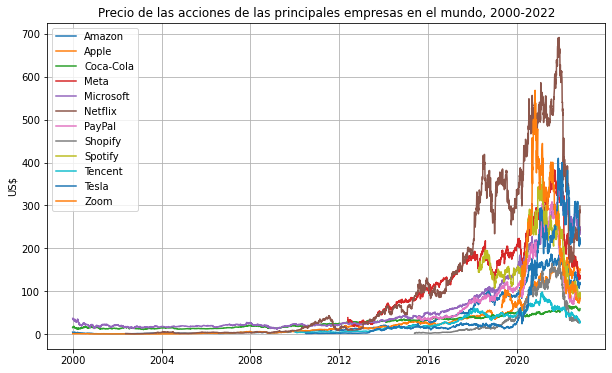

In [11]:
plt.figure(figsize=(10,6))
plt.title("Precio de las acciones de las principales empresas en el mundo, 2000-2022")

# Iteracion para graficar todas las variables
for company in companies_name:
    plt.plot(data.index, data[company], label = company)

plt.ylabel("US$")

plt.grid(True)
plt.legend()
plt.savefig("./graphs/cotizaciones2000_2022.pdf")

plt.show()

Para estudiar el desempeno de estas empresas durante el periodo de pandemia, se debe reducir del horizonte de analisis tomando como fecha de inicio octubre del 2019 hasta la informacion mas reciente (y que continua actualizandose dia a dia)

In [12]:
data_pandemia = data[data.index >= "2019-10-01"]

In [13]:
data_pandemia.tail()

,Amazon,Apple,Coca-Cola,Meta,Microsoft,Netflix,PayPal,Shopify,Spotify,Tencent,Tesla,Zoom
Date,,,,,,,,,,,,
2022-10-20,115.250000,143.389999,55.080002,131.529999,236.149994,268.160004,84.779999,29.73,87.739998,29.730000,207.279999,79.959999
2022-10-21,119.320000,147.270004,55.959999,130.009995,242.119995,289.570007,83.940002,29.75,88.699997,29.920000,214.440002,80.980003
2022-10-24,119.820000,149.449997,57.570000,129.720001,247.250000,282.450012,83.320000,28.75,94.660004,25.680000,211.250000,80.610001
2022-10-25,120.599998,152.339996,58.950001,137.509995,250.660004,291.019989,89.239998,29.83,97.050003,25.820000,222.419998,84.089996
2022-10-26,115.769997,148.750000,59.290001,128.889999,232.559998,298.679993,88.459999,29.10,84.430000,27.870001,224.464905,83.400002


Para presentar cada precio de manera individual, pero dentro de una figura, se usara los _subplot_ de _matplotlib_. No obstante, previo a realizarlo, es importante recalcar que el uso del metodo _enumerate_ brindara la posicion de cada empresa dentro de la lista _companies\_name_. No obstante, la enumeracion de cada subgrafico deberia comenzar con la posicion "1" para implementarlo en los _subplots_, pero comienza por la posicion "0". Debido a este problema, es necesario sumar uno a cada una de las posiciones en el momento de referenciarlos en el _loop_.

Con la finalidad de ejemplificar este punto, a continuacion se presentara la lista _companies\_name_ y la enumeracion por defecto asignado por _Python_

In [14]:
list(enumerate(companies_name))

[(0, 'Amazon'),
 (1, 'Apple'),
 (2, 'Coca-Cola'),
 (3, 'Meta'),
 (4, 'Microsoft'),
 (5, 'Netflix'),
 (6, 'PayPal'),
 (7, 'Shopify'),
 (8, 'Spotify'),
 (9, 'Tencent'),
 (10, 'Tesla'),
 (11, 'Zoom')]

Con lo mencionado previamente, se va a crear una figura general, la cual contara con subfiguras en su interior. El entorno a crearse tendra una dimension de (4,3), por lo que unicamente podran entrar doce empresas (en caso de requerir un entorno mayor, se puede modificar las dimensiones). Cada subgrafica sera llamada con un _loop_ y tendra el mismo formato en cada uno de los casos. El orden asignado para cada subgrafica sera referenciada mediante la posicion que cuente en la lista _companies\_name_, pero adicionandole un "uno", por las razones ya previamente explicadas

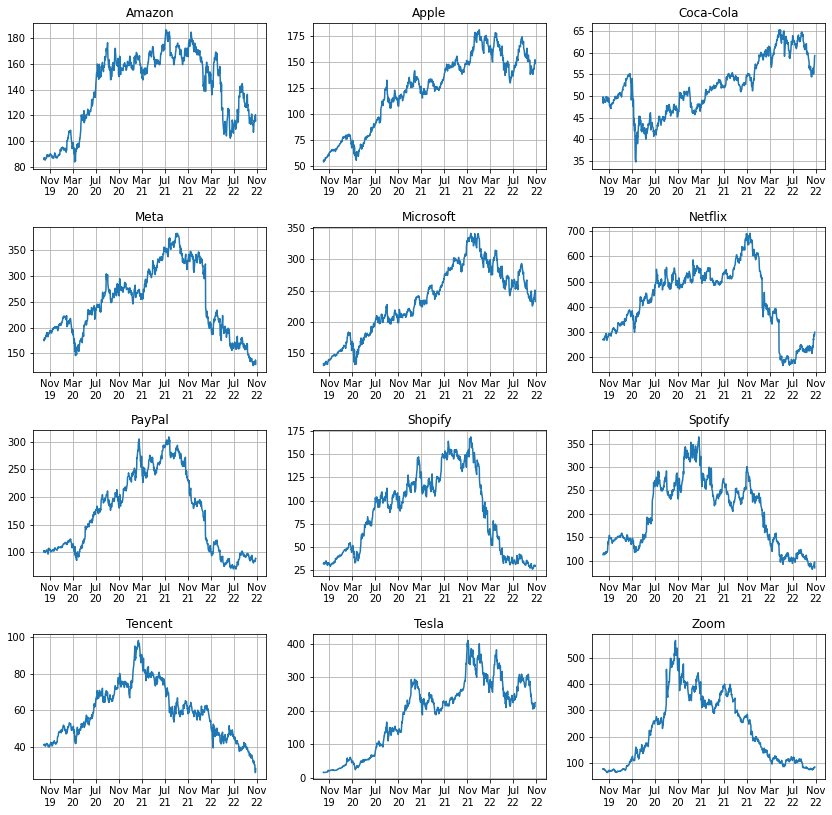

In [15]:
plt.figure(figsize=(20,15))

for i in enumerate(companies_name):
    ax = plt.subplot(4, 3, i[0]+1)
    plt.plot(data_pandemia.index, data_pandemia[i[1]])
    plt.title(i[1])
    plt.grid(True)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%y"))

# Moficiando las dimensiones entre cada graficas
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

plt.savefig("./graphs/cotizaciones2019_2022.pdf")

Ademas, es relevante realizar un analisis en terminos de variaciones porcentuales. Para ello, se realiza una copia a la variable _data_pandemia_, usada para realizar los graficos ya mostrados. Esto se realizara con el metodo `copy`

In [16]:
data_groth = data_pandemia.copy()

La nueva variable creada es _data_groth_. Esta debe contar con las variaciones porcentuales, por lo que a cada una de las columnas se le reemplazara por sus tasas de crecimientos con la de un periodo previo. Una de las formas para hallarla es mediante la diferencia entre los logaritmos de un periodo con su rezago. El rezago de una variable se puede referenciar mediante el metodo `shift(x)`, donde "x" es la cantidad de rezagos

In [17]:
for stock in companies_name:
    data_groth[stock] = np.log(data_groth[stock]) - np.log(data_groth[stock]).shift(1)

In [18]:
data_groth.head()

,Amazon,Apple,Coca-Cola,Meta,Microsoft,Netflix,PayPal,Shopify,Spotify,Tencent,Tesla,Zoom
Date,,,,,,,,,,,,
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-02,-0.013002,-0.025388,-0.029149,-0.006906,-0.017813,-0.005766,-0.027689,-0.009173,0.012190,-0.009447,-0.006396,-0.026194
2019-10-03,0.006510,0.008459,0.014217,0.027009,0.012033,0.000448,0.012951,0.047845,0.008045,0.014257,-0.042429,0.039559
2019-10-04,0.008793,0.027646,0.012918,0.005947,0.013411,0.017156,0.017271,0.004994,0.013839,-0.006258,-0.006890,-0.003912
2019-10-07,-0.004026,0.000220,-0.012361,-0.004276,-0.007266,0.006103,-0.011448,-0.002693,-0.004822,-0.010192,0.026816,0.005993


Con la data en terminos de tasas de crecimiento se puede realizar, nuevamente, una figura que cuenta con subfiguras de cada una de las empresas. El codigo es similar al previamente mostrado. Con estas graficas se puede observar la volatilidad de cada uno de los precios durante el horizonte temporal de estudio

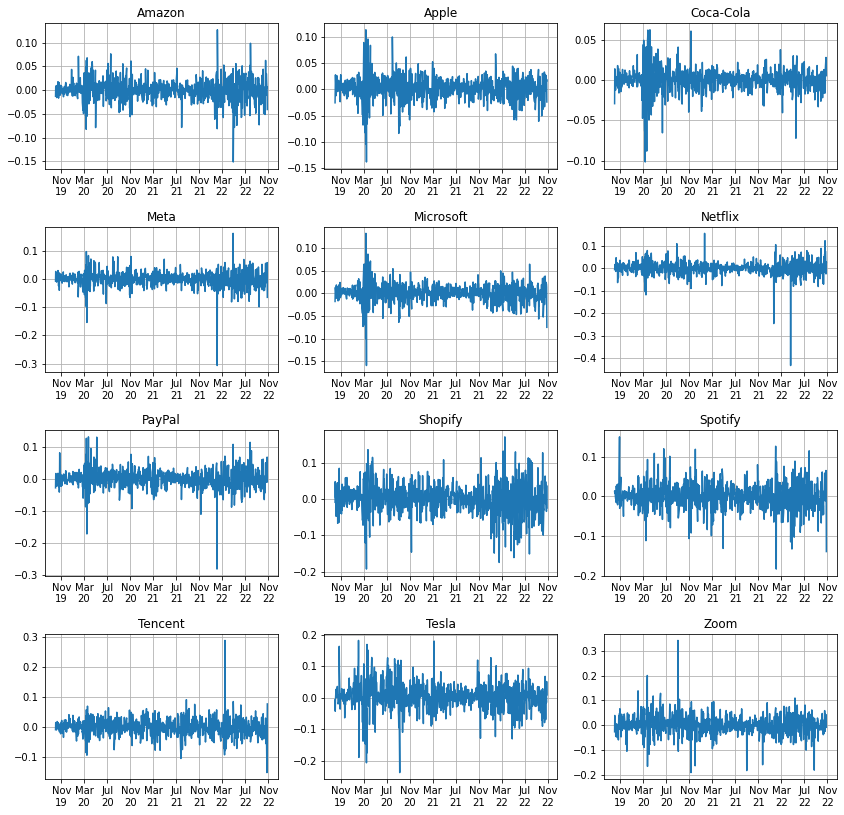

In [19]:
plt.figure(figsize=(20,15))

for i in enumerate(companies_name):
    ax = plt.subplot(4, 3, i[0]+1)
    plt.plot(data_groth.index, data_groth[i[1]])
    plt.title(i[1])
    plt.grid(True)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%y"))
    
# Modificando las dimensiones entre cada graficas
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

plt.savefig("./graphs/retornos2019_2022.pdf")

Finalmente, se puede crear un `heatmap` de la matriz de correlaciones. Esto nos permitira observar si existe correlaciones en los movimientos de algunas acciones de las empresas. Se esperaria que aquellas empresas que estan en el mismo rubro o industria deberian tener una correlacion alta, y por el contrario, las que no esten en la misma industria, una relacion quizas un poco mas bajo. La matriz de correlacion de definira de la siguiente manera:

In [20]:
data_pandemia_corr = data_pandemia.corr()

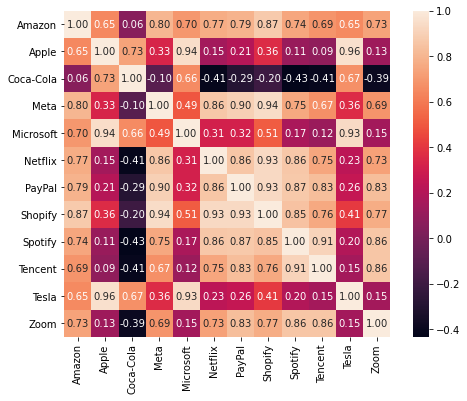

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data_pandemia_corr, cbar = True, annot = True, square = True,
            fmt = ".2f", annot_kws = {"size":10}, vmax = 1)

plt.savefig("./graphs/correl2019_2022.pdf")
plt.show()

Como era de esperarse, las empresas del sector tecnologico cuentan con alta correlacion durante la pandemia. Estas empresas han mantenido un gran crecimiento a diferencia de la empresa _CocaCola_ que es de consumo masivo y requiere de cadenas de suministros, los cuales fueron parcialmente paralizados en el 2020